### Уровень 1:
Найдите спектральное разложение матрицы:

m = np.array([[1, 2],
              [2,3]])

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*    


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error


In [41]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [42]:
a, U = linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)


Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [43]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


In [46]:
data, y = load_digits(return_X_y=True)

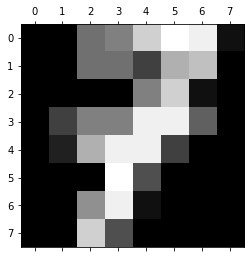

In [48]:
image = data[7]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [64]:
n_max = data.shape[1]
err = []
for n in range(1,n_max):
    svd = TruncatedSVD(n_components=n)
    data_reduced = svd.fit_transform(data)
    data_restored = svd.inverse_transform(data_reduced)
    mse = mean_squared_error(data, data_restored)
    err.append(mse)

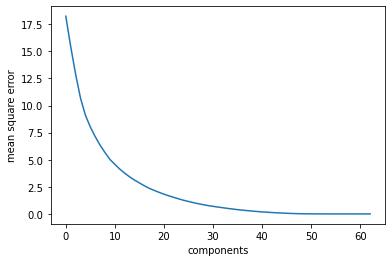

In [65]:
plt.plot(err)
plt.xlabel('components')
plt.ylabel('mean square error')
plt.show()

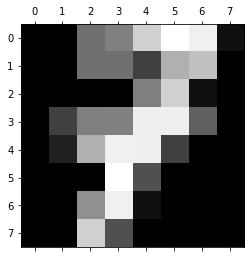

In [66]:
image = data_restored[7]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()